In [1]:
df='''date,device,user_id,user_age,stay_time,page_view,purchased,price,qty
2025-01-01,mobile,U001,25,120,5,1,12000,2
2025-01-01,pc,U002,34,300,12,1,45000,1
2025-01-01,mobile,U003,41,80,3,0,0,0
2025-01-02,pc,U004,29,200,7,1,38000,1
2025-01-02,mobile,U005,37,150,6,1,21000,1
2025-01-02,pc,U006,46,60,2,0,0,0
2025-01-03,mobile,U007,33,90,4,0,0,0
2025-01-03,pc,U008,52,400,15,1,67000,1
2025-01-03,mobile,U009,28,180,8,1,15000,1
2025-01-04,pc,U010,44,70,3,0,0,0
2025-01-04,mobile,U011,31,220,10,1,29000,1
2025-01-04,mobile,U012,26,50,2,0,0,0
2025-01-05,pc,U013,39,260,11,1,52000,1
2025-01-05,mobile,U014,48,130,5,0,0,0
2025-01-06,pc,U015,35,310,14,1,61000,1
2025-01-06,mobile,U016,23,100,4,1,18000,1
'''

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)


In [3]:
from io import StringIO

In [5]:
df1=pd.read_csv(StringIO(df))

In [6]:
df1

,date,device,user_id,user_age,stay_time,page_view,purchased,price,qty
0,2025-01-01,mobile,U001,25,120,5,1,12000,2
1,2025-01-01,pc,U002,34,300,12,1,45000,1
2,2025-01-01,mobile,U003,41,80,3,0,0,0
3,2025-01-02,pc,U004,29,200,7,1,38000,1
4,2025-01-02,mobile,U005,37,150,6,1,21000,1
5,2025-01-02,pc,U006,46,60,2,0,0,0
6,2025-01-03,mobile,U007,33,90,4,0,0,0
7,2025-01-03,pc,U008,52,400,15,1,67000,1
8,2025-01-03,mobile,U009,28,180,8,1,15000,1
9,2025-01-04,pc,U010,44,70,3,0,0,0


In [7]:
df1.head(5)

,date,device,user_id,user_age,stay_time,page_view,purchased,price,qty
0,2025-01-01,mobile,U001,25,120,5,1,12000,2
1,2025-01-01,pc,U002,34,300,12,1,45000,1
2,2025-01-01,mobile,U003,41,80,3,0,0,0
3,2025-01-02,pc,U004,29,200,7,1,38000,1
4,2025-01-02,mobile,U005,37,150,6,1,21000,1


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       16 non-null     object
 1   device     16 non-null     object
 2   user_id    16 non-null     object
 3   user_age   16 non-null     int64 
 4   stay_time  16 non-null     int64 
 5   page_view  16 non-null     int64 
 6   purchased  16 non-null     int64 
 7   price      16 non-null     int64 
 8   qty        16 non-null     int64 
dtypes: int64(6), object(3)
memory usage: 1.2+ KB


In [9]:
df1.isnull().sum()

date         0
device       0
user_id      0
user_age     0
stay_time    0
page_view    0
purchased    0
price        0
qty          0
dtype: int64

In [10]:
df1['date']=pd.to_datetime(df1['date'])

In [11]:
df1

,date,device,user_id,user_age,stay_time,page_view,purchased,price,qty
0,2025-01-01,mobile,U001,25,120,5,1,12000,2
1,2025-01-01,pc,U002,34,300,12,1,45000,1
2,2025-01-01,mobile,U003,41,80,3,0,0,0
3,2025-01-02,pc,U004,29,200,7,1,38000,1
4,2025-01-02,mobile,U005,37,150,6,1,21000,1
5,2025-01-02,pc,U006,46,60,2,0,0,0
6,2025-01-03,mobile,U007,33,90,4,0,0,0
7,2025-01-03,pc,U008,52,400,15,1,67000,1
8,2025-01-03,mobile,U009,28,180,8,1,15000,1
9,2025-01-04,pc,U010,44,70,3,0,0,0


In [13]:
df1['총매출']=df1['price']*df1['qty']

In [14]:
df1

,date,device,user_id,user_age,stay_time,page_view,purchased,price,qty,총매출
0,2025-01-01,mobile,U001,25,120,5,1,12000,2,24000
1,2025-01-01,pc,U002,34,300,12,1,45000,1,45000
2,2025-01-01,mobile,U003,41,80,3,0,0,0,0
3,2025-01-02,pc,U004,29,200,7,1,38000,1,38000
4,2025-01-02,mobile,U005,37,150,6,1,21000,1,21000
5,2025-01-02,pc,U006,46,60,2,0,0,0,0
6,2025-01-03,mobile,U007,33,90,4,0,0,0,0
7,2025-01-03,pc,U008,52,400,15,1,67000,1,67000
8,2025-01-03,mobile,U009,28,180,8,1,15000,1,15000
9,2025-01-04,pc,U010,44,70,3,0,0,0,0


In [17]:
df1=df1[df1['총매출']!=0]

In [18]:
df1

,date,device,user_id,user_age,stay_time,page_view,purchased,price,qty,총매출
0,2025-01-01,mobile,U001,25,120,5,1,12000,2,24000
1,2025-01-01,pc,U002,34,300,12,1,45000,1,45000
3,2025-01-02,pc,U004,29,200,7,1,38000,1,38000
4,2025-01-02,mobile,U005,37,150,6,1,21000,1,21000
7,2025-01-03,pc,U008,52,400,15,1,67000,1,67000
8,2025-01-03,mobile,U009,28,180,8,1,15000,1,15000
10,2025-01-04,mobile,U011,31,220,10,1,29000,1,29000
12,2025-01-05,pc,U013,39,260,11,1,52000,1,52000
14,2025-01-06,pc,U015,35,310,14,1,61000,1,61000
15,2025-01-06,mobile,U016,23,100,4,1,18000,1,18000


In [20]:
df1.loc[(df1['user_age']>=20)&(df1['user_age']<30),'연령대']='20대'
df1.loc[(df1['user_age']>=30)&(df1['user_age']<40),'연령대']='30대'
df1.loc[(df1['user_age']>=40)&(df1['user_age']<50),'연령대']='40대'
df1.loc[(df1['user_age']>=50)&(df1['user_age']<60),'연령대']='50대'

C:\Users\SHIN\AppData\Local\Temp\ipykernel_15532\960656067.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.loc[(df1['user_age']>=20)&(df1['user_age']<30),'연령대']='20대'
C:\Users\SHIN\AppData\Local\Temp\ipykernel_15532\960656067.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '20대' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df1.loc[(df1['user_age']>=20)&(df1['user_age']<30),'연령대']='20대'


In [21]:
df1

,date,device,user_id,user_age,stay_time,page_view,purchased,price,qty,총매출,연령대
0,2025-01-01,mobile,U001,25,120,5,1,12000,2,24000,20대
1,2025-01-01,pc,U002,34,300,12,1,45000,1,45000,30대
3,2025-01-02,pc,U004,29,200,7,1,38000,1,38000,20대
4,2025-01-02,mobile,U005,37,150,6,1,21000,1,21000,30대
7,2025-01-03,pc,U008,52,400,15,1,67000,1,67000,50대
8,2025-01-03,mobile,U009,28,180,8,1,15000,1,15000,20대
10,2025-01-04,mobile,U011,31,220,10,1,29000,1,29000,30대
12,2025-01-05,pc,U013,39,260,11,1,52000,1,52000,30대
14,2025-01-06,pc,U015,35,310,14,1,61000,1,61000,30대
15,2025-01-06,mobile,U016,23,100,4,1,18000,1,18000,20대


In [23]:
df2=df1.groupby('device').agg(방문자수=('user_id','count'),
                         구매자수=('purchased','sum'),
                         구매전환율=('purchased','mean'),
                         총매출금액=('총매출','sum'))

In [25]:
df2['평균주문금액']=df2['총매출금액']/df2['구매자수']

In [26]:
df2

,방문자수,구매자수,구매전환율,총매출금액,평균주문금액
device,,,,,
mobile,5,5,1.0,107000,21400.0
pc,5,5,1.0,263000,52600.0


In [28]:
df2=df2.reset_index()

In [29]:
df2

,device,방문자수,구매자수,구매전환율,총매출금액,평균주문금액
0,mobile,5,5,1.0,107000,21400.0
1,pc,5,5,1.0,263000,52600.0


In [31]:
df1.groupby('date')['총매출'].mean()

date
2025-01-01    34500.0
2025-01-02    29500.0
2025-01-03    41000.0
2025-01-04    29000.0
2025-01-05    52000.0
2025-01-06    39500.0
Name: 총매출, dtype: float64

In [32]:
pd.pivot_table(data=df1,index='date',values='총매출')

,총매출
date,
2025-01-01,34500.0
2025-01-02,29500.0
2025-01-03,41000.0
2025-01-04,29000.0
2025-01-05,52000.0
2025-01-06,39500.0


In [33]:
df2

,device,방문자수,구매자수,구매전환율,총매출금액,평균주문금액
0,mobile,5,5,1.0,107000,21400.0
1,pc,5,5,1.0,263000,52600.0


In [34]:
df1

,date,device,user_id,user_age,stay_time,page_view,purchased,price,qty,총매출,연령대
0,2025-01-01,mobile,U001,25,120,5,1,12000,2,24000,20대
1,2025-01-01,pc,U002,34,300,12,1,45000,1,45000,30대
3,2025-01-02,pc,U004,29,200,7,1,38000,1,38000,20대
4,2025-01-02,mobile,U005,37,150,6,1,21000,1,21000,30대
7,2025-01-03,pc,U008,52,400,15,1,67000,1,67000,50대
8,2025-01-03,mobile,U009,28,180,8,1,15000,1,15000,20대
10,2025-01-04,mobile,U011,31,220,10,1,29000,1,29000,30대
12,2025-01-05,pc,U013,39,260,11,1,52000,1,52000,30대
14,2025-01-06,pc,U015,35,310,14,1,61000,1,61000,30대
15,2025-01-06,mobile,U016,23,100,4,1,18000,1,18000,20대


In [41]:
corr_df=df1[['stay_time','page_view','총매출']].corr()

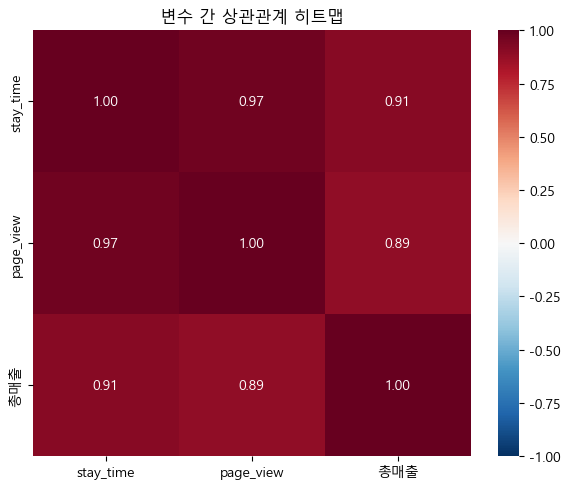

In [46]:
plt.figure(figsize=(6,5))

sns.heatmap(
corr_df,
annot=True,
fmt='.2f',
cmap='RdBu_r',
vmin=-1,vmax=1)

plt.title('변수 간 상관관계 히트맵')
plt.tight_layout()
plt.show()

In [49]:
device_dummy=pd.get_dummies(df1['device'],
                           prefix='device',                            
                            drop_first=True)

In [51]:
df1

,date,device,user_id,user_age,stay_time,page_view,purchased,price,qty,총매출,연령대
0,2025-01-01,mobile,U001,25,120,5,1,12000,2,24000,20대
1,2025-01-01,pc,U002,34,300,12,1,45000,1,45000,30대
3,2025-01-02,pc,U004,29,200,7,1,38000,1,38000,20대
4,2025-01-02,mobile,U005,37,150,6,1,21000,1,21000,30대
7,2025-01-03,pc,U008,52,400,15,1,67000,1,67000,50대
8,2025-01-03,mobile,U009,28,180,8,1,15000,1,15000,20대
10,2025-01-04,mobile,U011,31,220,10,1,29000,1,29000,30대
12,2025-01-05,pc,U013,39,260,11,1,52000,1,52000,30대
14,2025-01-06,pc,U015,35,310,14,1,61000,1,61000,30대
15,2025-01-06,mobile,U016,23,100,4,1,18000,1,18000,20대


In [53]:
df1=pd.concat([df1,device_dummy],axis=1)